# Einsatz von Gradientenabstiegsverfahren in Neuronale Netzen

# Inhalt

- Optimierungsgrundlagen
    - *Gradientenabstieg*
- Lernen als Optimierung in Neuronale Netwzwerk 
    - Intuition
    - Mechanismen
- Gradientenabstieg in Rückwärtspropagierung (Backpropagation)
- Analyse von Gradientenabstiegsmethoden
- Gradientenabstieg in der Praxis
- Effiziente Implementierungen
- Fazit


# Optimierungsgrundlagen

# Optimierungsgrundlagen

Optimierungsalgorithmen sind in der Regel iterative Verfahren. Ausgehend von einem gegebenen Punkt $ x^0 (+) $ erzeugen sie eine Folge $ {x^k} $ von Iteraten (oder Versuchslösungen), die zu einer "Lösung" konvergieren (o).
![](./optimization.gif)

# Optimierungsgrundlagen

<div>
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/opt-types1-notext.png">
</div>

# Optimierungsgrundlagen

<div>
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/opt-types2-notext.png">
</div>

# Optimierungsgrundlagen

<div>
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/opt-types3-notext.png">
</div>

# Gradientenabstieg

# Gradientenabstieg

Sei $f$ eine differenzierbare Funktion und nehmen wir an, dass wir den Gradienten-Vektor berechnen können. Wir wollen Lösen Sie das uneingeschränkte Minimierungsproblem

$$ \min \limits_{x \in R}f(x)$$

![](./backprop-sketch/gradient-descent-diagram.png)

# Lernen als Optimierung in Neuronale Netzwerk - Intuition

# Lernen als Optimierung in Neuronale Netzwerk - Intuition

Optimierungsalgorithmen helfen uns, eine **Zielfunktion zu minimieren (oder zu maximieren)**. 

# Lernen als Optimierung in Neuronale Netzwerk - Intuition

Optimierungsalgorithmen helfen uns, eine **Zielfunktion zu minimieren (oder zu maximieren)**. 

![](./backprop-sketch/basic_net.png)

# Lernen als Optimierung in Neuronale Netzwerk - Intuition

Optimierungsalgorithmen helfen uns, eine **Zielfunktion zu minimieren (oder zu maximieren)**. Ein solches Ziel ist in **neuronalen Netzen** einfach eine **mathematische Funktion (E)**, die von den **internen lernbaren Parametern (W)** des Modells abhängt.

Diese **Parameter** werden bei der Berechnung der **erwarteten Werte (Y)** aus dem Satz von **Prädiktoren (X)** verwendet, die im Modell verwendet werden.

![](./backprop-sketch/basic_net.png)

# Lernen als Optimierung in Neuronale Netzwerk - Intuition

Schritte zur **Erreichung der erwarteten Ausgabe** werden unternommen, um eine **optimale Lösung zu finden**, z.B Verlust $E$ minimieren.

# Lernen als Optimierung in Neuronale Netzwerk - Intuition

Schritte zur **Erreichung der erwarteten Ausgabe** werden unternommen, um eine **optimale Lösung zu finden**, z.B Verlust $E$ minimieren.

Diese **Parameter** werden im **Trainingsprozess des Netzwerks** durch Optimierung aktualisiert, die **lokal verfügbare Informationen** ausnutzt [4].

![](./backprop-sketch/basic_net_locality.png)

# Lernen als Optimierung in Neuronale Netzwerk - Mechanismen

<div>
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/1.png">
</div>

*Figur angepasst von [1]*

# Lernen als Optimierung in Neuronale Netzwerk - Mechanismen

<div>
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/2.png">
</div>

# Lernen als Optimierung in Neuronale Netzwerk - Mechanismen

<div>
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/2.png">
  <span style="vertical-align: middle; display: inline; font-size:15px">
      Gesamteingabe $ x_j = \sum_{i\in in(j)} w_{ij} y_i +b_j $, 
      Ausgabe $ y_j = f (x_j) $
  </span>
</div>

# Lernen als Optimierung in Neuronale Netzwerk - Aktivierungsfunktion

Die **Aktivierungsfunktion** $ f (x) $ muss eine **nichtlineare Funktion** sein, sonst kann das neuronale Netzwerk nur lineare Modelle lernen.
![](./backprop-sketch/squashings.png)

# Lernen als Optimierung in Neuronale Netzwerk - Aktivierungsfunktion

|Sigmoid |ReLu | Tanh|
|:-----:|:-----:|:-----:|
|$ f (x) = 1 / (1 + e ^ {- x}) $ | $ f (x) = max (0, x) $ | $ f(x) = \frac {e ^ {x} - e ^ {- x}} {e ^ {x} + e ^ {- x}} $ |
|  glatte Steigung | weniger rechenintensiv als tanh und sigmoid, da es sich um einfachere mathematische Operationen handelt | Starke Nichtlinearität  |
|  sättigen und verschwindenden Gradient | vermeidet und behebt das Problem des verschwindenden Gradient  | hat auch das Problem mit verschwindenden Gradient  |
| Ausgänge sind nicht nullzentriert | kann zu toten Neuronen führen |  Gradient ist stärker als für Sigmoid (Derivate sind steiler)| 

# Lernen als Optimierung in Neuronale Netzwerk - Mechanismen

<div>
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/3.png">
  <span style="vertical-align: middle; display: inline; font-size:15px">Die vorhergesagte Ausgabe ergeben $y_{output}$  muss nah am Zielwert sein $y_{target}$ für alle Eingaben $x_{input}$. </span>
</div>

# Lernen als Optimierung in Neuronale Netzwerk - Mechanismen

<div>
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/3.png">
  <span style="vertical-align: middle; display: inline; font-size:15px">
   Die Fehlerfunktion $ E $, z.B. $E(y_{output}, y_{target})=\frac{1}{2}(y_{output}−y_{target})^2$ ist das Optimierungskriterium.
  </span>
</div>

# Lernen als Optimierung in Neuronale Netzwerk - Mechanismen

<div>
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/3.png">
  <span style="vertical-align: middle; display: inline; font-size:15px">
Wir versorgen das Netzwerk mit Beispielen $(x_{input},y_{target})$ und aktualisieren Sie das Eingabe-Neuron.
  </span>
</div>


# Lernen als Optimierung in Neuronale Netzwerk - Mechanismen

<div>
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/7.png">
  <span style="vertical-align: middle; display: inline; font-size:15px">
Wir folgen den gleichen Aktualisierungen für alle Neuronen in jeder verborgenen Schicht.
    </span>
</div>



# Gradientenabstieg in Backpropagation

# Gradientenabstieg in Backpropagation

*Rückwärtspropagierung (Backpropagation)* ist ein Spezialfall eines allgemeinen **Gradientenverfahrens in der Optimierung**, basierend auf dem **mittleren quadratischen Fehler**.

# Gradientenabstieg in Backpropagation
Backpropagation entscheidet, **wie oft jedes Gewicht des Netzwerks aktualisiert werden soll**, nachdem die vorhergesagte Ausgabe $y_{output}$ mit der gewünschten Ausgabe $y_{target}$ für ein bestimmtes Beispiel verglichen wurde, $E(y_{output}, y_{target})=\frac{1}{2}(y_{output}−y_{target})^2$.

# Gradientenabstieg in Backpropagation
Backpropagation verwendet Gradientenabstiegoptimierung. Es werden **Iterationen in Richtung einer Lösung** durchgeführt, die **proportional zum Negativ des Gradienten** von $ E $ am aktuellen Punkt sind.

Jedes Neuron folgt grundsätzlich das gleiche Gradientenabstieg:
 $$ w_{ij} = w_{ij} - \eta \frac{dE}{dw_{ij}}$$
 
 
Wenn der Fehler nachlässt und das Gewicht zunimmt ($ \frac {dE} {dw_ {ij}} <0 $), erhöhen Sie das Gewicht, andernfalls, wenn der Fehler nachlässt und das Gewicht zunimmt ($ \frac {dE} { dw_ {ij}}> 0 $), dann verringern Sie das Gewicht. 

# Gradientenabstieg in Backpropagation
<div>
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/8.png">
</div>

# Gradientenabstieg in Backpropagation
<div>
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/8.png">
  <span style="vertical-align: middle; display: inline; font-size:15px">
    Berechnen wir wie sich der Fehler $E$ in Bezug auf jedes Gewicht ändert $ \frac{dE}{dw_{ij}} $
    </span>
</div>

# Gradientenabstieg in Backpropagation
<div>
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/10.png">
  <span style="vertical-align: middle; display: inline; font-size:15px">
 Berechnen wir wie sich der Fehler ändert mit $ \frac {dE} {dx} $ und $ \frac {dE} {dy} $.
    </span>
</div>

# Gradientenabstieg in Backpropagation
<div>
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/11.png">
  <span style="vertical-align: middle; display: inline; font-size:15px">
Für $E = \frac{1}{2}(y_{output}\color{black} - y_{target})^2$ wir haben $\frac{\partial E}{\partial y_{output}} = y_{output}  - y_{target}$ 
    </span>
</div>

# Gradientenabstieg in Backpropagation
<div>
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/12.png">
  <span style="vertical-align: middle; display: inline; font-size:15px">
Wir können $\frac{dE}{dx}$ mit der Kettenregel erhalten $ \frac{\partial E}{\partial x} = \frac{dy}{dx}\frac{\partial E}{\partial y} = \frac{d}{dx}f(x)\frac{\partial E}{\partial y} $
    </span>
</div>

# Gradientenabstieg in Backpropagation
<div>
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/12.png">
  <span style="vertical-align: middle; display: inline; font-size:15px">
Die Fehlerableitung in Bezug auf die Gewichte $ \frac{\partial E}{\partial w_{ij}}= \frac{\partial x_j}{\partial w_{ij}}\frac{\partial E}{\partial x_j} = y_i  \frac{\partial E}{\partial x_j}    $
    </span>
</div>

# Gradientenabstieg in Backpropagation
<div>
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/bakprop-full.gif">
  <span style="vertical-align: middle; display: inline; font-size:15px">
Wir wiederholen den Vorgang für jedes Beispiel im Trainingsdatensatz.
    </span>
</div>

# Analyse von Gradientenabstiegsmethoden

# Analyse von Gradientenabstiegsmethoden

Um den **optimalen Wert der neuronalen Netzwerkparameter** herauszufinden, müssen wir sie kontinuierlich mit der Backpropagation-Aktualisierungsregel iterieren.


# Analyse von Gradientenabstiegsmethoden

Wir verwenden **verschiedene Optimierungsalgorithmen (basierend auf dem Gradientenabstieg)**, um eine Aktualisierungsregel bereitzustellen, und jeder Optimierungsalgorithmus hat einen anderen **Ansatz zum Berechnen** , **Aktualisieren** und **Ermitteln** des optimalen Werts von Modellparametern [6].


# Analyse von Gradientenabstiegsmethoden

Abhängig von der Datenmenge machen wir einen **Kompromiss zwischen die Genauigkeit der Parameteraktualisierung und die Zeit**, die zur Durchführung einer Aktualisierung benötigt wird.

# Analyse von Gradientenabstiegsmethoden

| Batch Gradient Descent | Stochastic Gradient Descent  |  Momentum | 
|:-------:|:-------:|:-------:|
| $ w_{t+1} = w_t - \eta \nabla E(w_t)$   |  $ w_{t+1} = w_{t} - \eta \nabla E(w_{t}, x^i, y^i)$  | $ v_{t+1} = \gamma v_t  + \eta \nabla E(w_t) \\ w_{t+1} = w_t - v_t$ | 
| Berechnet die Verläufe für das gesamte Dataset, um nur eine Aktualisierung durchzuführen. Dies kann daher sehr langsam sein und ist für Datasets, die nicht in den Speicher passen, nicht ausführbar. Das Modell kann nicht online aktualisiert werden. | Führt für jedes Trainingsbeispiel $ x^i $ und die Bezeichnung $ y^i $ eine Parameteraktualisierung durch. | Beschleunigt in die jeweilige Steigungsrichtung und dämpft Schwingungen. |
| Konvergiert garantiert zum globalen Minimum für konvexe Fehleroberflächen und zu einem lokalen Minimum für nichtkonvexe Oberflächen. | Fluktuation ermöglicht es, zu neuen und möglicherweise besseren lokalen Minima zu springen, erschwert jedoch die Konvergenz auf das genaue Minimum (Überschießen). | Fügt einen Impuls in Richtung gleichmäßiger Verläufe hinzu und bricht den Impuls ab, wenn sich die Verläufe in verschiedenen Richtungen befinden. |

# Analyse von Gradientenabstiegsmethoden

| Nesterov |  Adagrad |  Adadelta   |  
|:-------:|:-------:|:-------:|
| $ v_{t+1} = \gamma v_t  + \eta \nabla E(w_t - \gamma v_t) \\ w_{t+1} = w_t - v_t$ | $w_{t+1} = w_t - \frac{\eta}{\sqrt{G_t + e}} g_t \\ g_t = \nabla E(w_t) \\ G_t = diag(\sum g_t )$ | $w_{t+1} = w_t - \Delta w_t \\ \Delta w_{t} = - \frac {RMS(\Delta w_t)}{RMS(g_t)}g_t \\ g_t = \nabla E(w_t) $  |   
| Gibt dem Momentum eine Annäherung an die nächste Position der Parameter. | Passt die Lernrate an die Parameter an und führt größere Aktualisierungen für seltene und kleinere Aktualisierungen für häufige Parameter durch.  |  Erweiterung von Adagrad, die versucht, die aggressive, monoton abnehmende Lernrate zu reduzieren, indem das Fenster für akkumulierte vergangene Gradienten auf eine feste Größe beschränkt wird. | 
| Kann effektiv vorausschauen, indem der Gradient nicht in Bezug auf die aktuellen Parameter $ w $ berechnet wird, sondern in Bezug auf die ungefähre zukünftige Position der Parameter  | Das manuelle Einstellen der Lernrate entfällt, aber die Akkumulation der quadratischen Gradienten im Nenner ist problematisch (d. H. Eine Explosion der Werte). |  Sammelt die vorherigen Steigungen in einem Teil (Gewicht), was ein schnelles Wachstum der Summe verhindert, lernt also weiter und versucht zu konvergieren.|

# Analyse von Gradientenabstiegsmethoden

|   RMSProp  |  Adaptive Moment Estimation (Adam)  | 
|:-------:|:-------:|
| $w_{t+1} = w_t - \frac{\eta}{\sqrt{1/t\sum(g_t)^2 + e}} g_t  \\ g_t = \nabla E(w_t)  $  |  $ w_{t+1} = w_t - \frac{\eta}{\sqrt{ \hat {v_t} + e}} \hat{m_t}   \\ m_{t+1} = \beta_1 m_t + (1 − \beta_1)g_t \\ v_{t+1} = \beta_2 v_t + (1 − \beta_2){g_t}^2 \\ \hat {m_t} = \frac{m_t}{1 - \beta_1} \\ \hat {v_t} = \frac{v_t}{1 - \beta_2} \\ g_t = \nabla E(w_t) $ |    
|  Überwindet das abnehmende Lernratenproblem von adagrad und verhindert das schnelle Anwachsen der laufenden Quadratsumme der Gradienten.  | Speichert einen exponentiell abfallenden Durchschnitt vergangener quadratischer Gradienten und einen exponentiell abfallenden Durchschnitt vergangener Gradienten, die dem Momentum ähnlich sind. |
|  Kombiniert die Idee, nur das Vorzeichen des Verlaufs zu verwenden, mit der Idee, die Schrittgröße für jedes Gewicht individuell anzupassen. |  Berechnet adaptive Lernraten für jeden Parameter für eine zuverlässige Schätzung. |

# Analyse von Gradientenabstiegsmethoden

![](./demo_anim.gif)

# Analyse von Gradientenabstiegsmethoden

![](./loss_anim.gif)

# Gradientenabstieg in der Praxis

## Binäre Klassifikation mit neuronalen Netzen

![](./backprop-sketch/hausaufgabe.png)

# Neuronale Netzwerkarchitektur

<div>
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/1.png">
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/code1.png">
</div>

# Neuronale Aktivierungsfunktion

<div>
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/2.png">
    <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/code2.png">
</div>

# Vorwärtsausbreitung des neuronalen Netzwerks

<div>
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/7.png">
    <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/code3.png">
</div>



# Rückwärtspropagierung Training

<div>
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/12.png">
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/code4.png">
</div>

# Ausführen des neuronalen Netzwerks

<div>
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/bakprop-full.gif">
   <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/code5.png">
</div>

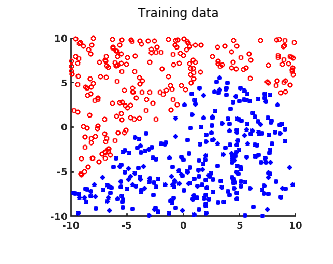

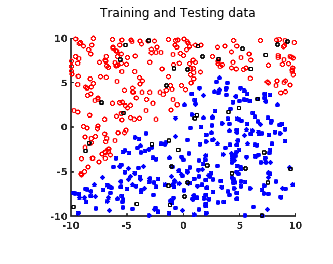

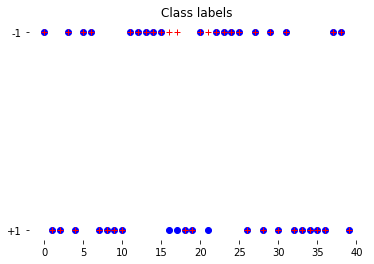

ANN ROC AUC=0.975


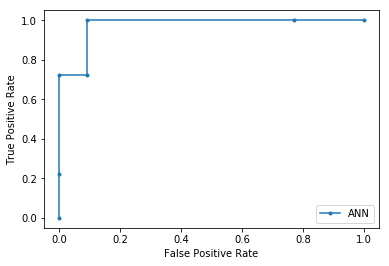

In [3]:
import random
import math
import time as t
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline


def f(x):
    return math.tanh(x)


def df(x):
    try:
        return 1 / (math.cosh(x) ** 2)
    except OverflowError:
        return 0


class Network:

    def __init__(self, l_in, l_hid, l_out, rate=0.05):
        self.num_layer_in = l_in
        self.num_layer_hid = l_hid
        self.num_layer_out = l_out

        self.w1 = []
        self.w2 = []

        # init weights inputs -> hidden
        for i in range(self.num_layer_in * self.num_layer_hid ):
            self.w1.append(random.randrange(-10, 10) * 0.01)

        # init weights hidden -> output
        for i in range(self.num_layer_hid * self.num_layer_out):
            self.w2.append(random.randrange(-10, 10) * 0.01)

        # init weights bias -> hidden
        for i in range(self.num_layer_hid):
            self.w1.append(random.randrange(-10, 10) * 0.01)

        # init weights bias -> output
        for i in range(self.num_layer_out):
            self.w2.append(random.randrange(-10, 10) * 0.01)

        self.learning_rate = rate

    def forward_propagation(self, data_in):
        net_hid = 0
        out_hid = []
        net_out = 0

        # Calculate net input and outputs for hidden layer
        for i in range(self.num_layer_hid):
            net_hid += float(data_in[0]) * self.w1[i]
            net_hid += float(data_in[1]) * self.w1[i + self.num_layer_hid]
            net_hid += self.w1[i + self.num_layer_in * self.num_layer_hid]
            out_hid.append(f(net_hid))

        # Calculate net input and output for output layer
        for i in range(self.num_layer_hid):
            net_out += out_hid[i] * self.w2[i]
        net_out += self.w2[self.num_layer_hid * self.num_layer_out]

        return f(net_out)

    def train(self, train_data):
        for data in train_data:
            net_hid = []
            out_hid = []
            net_out = 0
            out_out = 0

            updates_w1 = []
            updates_w2 = []

            # Calculate net input and outputs for hidden layer
            net = 0
            for i in range(self.num_layer_hid):
                net += float(data[0]) * self.w1[i]
                net += float(data[1]) * self.w1[i + self.num_layer_hid]
                net += self.w1[i + self.num_layer_in * self.num_layer_hid]
                net_hid.append(net)
                out_hid.append(f(net))

            # Calculate net input and output for output layer
            net = 0
            for i in range(self.num_layer_hid):
                net += out_hid[i] * self.w2[i]
            net += self.w2[self.num_layer_hid * self.num_layer_out]
            net_out = net
            out_out = f(net)

            # w2 weights update
            for i in range(len(self.w2)):
                if i < len(self.w2) - self.num_layer_out:
                    update = self.learning_rate * (float(data[2]) - out_out) * df(net_out) * out_hid[i]
                else:
                    update = self.learning_rate * (float(data[2]) - out_out) * df(net_out)
                updates_w2.append(update)

            # w1 weights update
            for i in range(len(self.w1)):
                if i < len(self.w1) - self.num_layer_hid:
                    if i < 4:
                        update = self.learning_rate * (float(data[2]) - out_out) * df(net_out) * self.w2[i % 4] * df(net_hid[i % 4]) * float(data[0])
                    else:
                        update = self.learning_rate * (float(data[2]) - out_out) * df(net_out) * self.w2[i % 4] * df(net_hid[i % 4]) * float(data[1])
                else:
                    update = self.learning_rate * (float(data[2]) - out_out) * df(net_out) * self.w2[i % 4] * df(net_hid[i % 4])
                updates_w1.append(update)

            # update weights w1
            for i, update in enumerate(updates_w1):
                self.w1[i] += update

            # update weights w2
            for i, update in enumerate(updates_w2):
                self.w2[i] += update


def main():
    network = Network(2, 5, 1)
    train_data = []
    f = open('./input_dataset.in')

    try:

        while 1: 
            new_in = f.readline().split(',')
            if len(new_in) < 3:
                break
            train_data.append(new_in)
            

        for _ in range(100):
            network.train(train_data)

        f = open('./testing_dataset.in')
        out_data = []
        test_data = []
        out_data_prob = []
        while 1:
            new_in = f.readline().split(',')
            if len(new_in) < 2:
                break
            new_in[0] = new_in[0][new_in[0].rfind(' ') + 1:]
            new_in[1] = new_in[1][new_in[1].rfind(' ') + 1:]
            output = network.forward_propagation(new_in)
            test_data.append(new_in)
            out_data_prob.append(output)
            if output > 0:
                output = '+1'
            else:
                output = '-1'
            out_data.append(output)
                
        f = open('./expected_dataset.in')
        out_expect_data = []
        while 1:
            new_in = f.readline().split('\n')
            if len(new_in) < 2:
                break
            out_expect_data.append(new_in[0])    

    except EOFError:
        print('', end='')
        
    # debug 
    plt.figure(1)
    img = mpimg.imread('./backprop-sketch/training_data.png')
    plt.imshow(img)
    plt.title('Training data')
    plt.box("off")
    plt.axis("off")
    plt.figure(2)
    img = mpimg.imread('./backprop-sketch/testing_data.png')
    plt.imshow(img)
    plt.title('Training and Testing data')
    plt.box("off")
    plt.axis("off")
    plt.figure(3)
    plt.plot(out_data, 'bo') 
    plt.plot(out_expect_data,'r+')
    plt.title('Class labels')
    plt.box("off")
    plt.show()

    # AUC / ROC curves 
    from sklearn.metrics import roc_curve
    from sklearn.metrics import roc_auc_score
    from matplotlib import pyplot
    lr_auc = roc_auc_score(list(map(int, out_expect_data)), out_data_prob)
    # summarize scores
    print('ANN ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    lr_fpr, lr_tpr, _ = roc_curve(list(map(int, out_expect_data)), out_data_prob)
    # plot the roc curve for the model
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='ANN')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()

if __name__ == '__main__':
    main()

# Gradientenabstieg in Backpropagation - Hausaufgabe

<div>
  <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/bakprop-full.gif">
   <img style="vertical-align: middle; display: inline;" src="./backprop-sketch/code-homework.png">
</div>

# Effiziente Implementierungen

# Effiziente Implementierungen

Angesichts der **Allgegenwart umfangreicher Datenlösungen** und der **Verfügbarkeit von Clustern, GPU [10], oder FPGA [11]** ist es eine logische Entscheidung, **neuronales Netzwerktraining zu verteilen**, um es schneller zu machen.


# Effiziente Implementierungen

Die **Optimierung des Gradientenabfalls** selbst ist von Natur aus **sequentiell und langsam**. Verschiedene **Algorithmen und Architekturen** wurden vorgeschlagen, um den Gradientenabstieg zu **parallelisieren und zu verteilen**.

# Effiziente Implementierungen

*Cluster Parallelisierung*

- Hogwild! [7]
    - Ermöglicht die parallele Durchführung von SGD-Updates auf CPUs
    - Prozessoren dürfen auf den gemeinsamen Speicher zugreifen, ohne die Parameter zu sperren
    - Jedes Update ändert nur einen Bruchteil aller Parameter
    - optimale Konvergenzrate.

Sei t = 1, 2, . . . Wähle zufällig eine Teilmenge aus $S ⊆ {1, . . . , n}$ mit Größe $b$
$$ w_{t+1} = w_t − \eta_t \frac{1}{b}\sum_{i \in S} \nabla f_i(w_t) $$ 

Parallelisierung mit $k$ Prozessoren. Sei $ S = S_1 ∪ S_2 ∪ · · · ∪ S_k $ dann

$$  \sum_{i \in S} \nabla f_i(w_t) = \sum_{i \in S_1} \nabla f_i(w_t)  + \sum_{i \in S_2} \nabla f_i(w_t) + ... + \sum_{i \in S_k} \nabla f_i(w_t)$$

kann parallel berechnet werden.

# Effiziente Implementierungen

*Cluster Parallelisierung*

- Downpour SGD [8]
    - Asynchrone Variante von SGD
    - Läuft mehrere Repliken eines Modells parallel auf Teilmengen der Trainingsdaten
    - Replikate kommunizieren nicht miteinander, z. durch das Teilen von Gewichten oder Aktualisierungen
    - Die Parameter sind ständig dem Risiko von Abweichungen ausgesetzt, was die Konvergenz behindert.

![](./backprop-sketch/parallel-sgd-arch.png)


# Effiziente Implementierungen

*Cluster Parallelisierung*

- TensorFlow [9]
    - Open-Source-Framework für die Implementierung und Bereitstellung von groß angelegten maschinellen Lernmodellen
    - der Ansatz "Daten parallel" für verteiltes Training umfasst die Aufteilung der Daten und das parallele Training auf mehreren Knoten [12].

![](./backprop-sketch/parallel-horovod-tensorflow.png)


# Conclusion

- Gradientenabstieg ist die typische Optimierungsmethode in neuronalen Netzen
- Lernen in Neuronale Netwzwerk ist ein iterativer Prozess
- Bei der Rückwärtspropagierung (Backpropagation) wird ein Gradientenabstieg verwendet, um zu einer Lösung zu konvergieren (d. h. die Gewichte zu finden), die die Fehlerfunktion minimiert
- Gradientenabstieg ist jedoch problematisch (d. h. Konvergenz, Präzision), und dennoch wurden in der Praxis viele verbesserte Verfahren entwickelt
- Das Verständnis des Gradientenabfalls bei der Diagnose der Backpropagation ist für erfolgreiche Anwendungen erforderlich

# Literaturverzeichnis

[1] https://google-developers.appspot.com/machine-learning/ (letzter Besuch, Dez 2019)

[2] Boyd, S., & Vandenberghe, L. (2004). Convex optimization. Cambridge university press.

[3] Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep learning. MIT press.

[4] Barnard, E. (1992). Optimization for training neural nets. IEEE transactions on Neural Networks, 3(2), 232-240.

[5] Ruder, S. (2016). An overview of gradient descent optimization algorithms. arXiv preprint arXiv:1609.04747.

[6] Haykin, S. (2010). Neural Networks and Learning Machines, 3/E. Pearson Education.

[7] Feng Niu et al., Hogwild!: A Lock-Free Approach to Parallelizing Stochastic Gradient Descent. pages 1–22, 2011.

[8] Jeffrey Dean et al., Large Scale Distributed Deep Networks. NIPS 2012: Neural Information Processing Systems, pages 1–11, 2012.

[9] Martin Abadi et al., TensorFlow: Large-Scale Machine Learning on Heterogeneous Distributed Systems. 2015.

[10] Song, F. et al., Enabling and scaling matrix computations on heterogeneous multicore and multi-GPU systems. In Proceedings of the 26th ACM international conference on Supercomputing (pp. 365-376), 2012.

[11] Liu, Q et al., Fast neural network training on FPGA using quasi-newton optimization method. IEEE Transactions on Very Large Scale Integration (VLSI) Systems, 26(8), 1575-1579, 2018.

[12] Sergeev, A et al., Horovod: fast and easy distributed deep learning in TensorFlow. arXiv preprint arXiv:1802.05799, 2018.

# Vorlessung Notebook herunterladen

<img src="./qrcode.png" style="width = 200, height=200"/>

# Optimierungsgrundlagen

![](./backprop-sketch/opt-types3.png)

# Optimierungsgrundlagen

| Algorithmen nullter Ordnung | Algorithmen erster Ordnung          |  Algorithmen zweiter Ordnung  |
| :-------------: |:-------------:| :---------------:|
| Gradient und die hessische Information schwer zu erhalten sind   | geeignet für Datenoptimierung in großem Maßstab mit geringen Genauigkeitsanforderungen |  Optimierungsprobleme mit hohem Genauigkeitsbedarf [3] |
| keine expliziten Funktionsformen angegeben sind, Funktionen nicht differenzierbar sind [2]   | Einfach zu berechnen und weniger zeitaufwendig      |   immer langsamer und kostenintensiver in Bezug auf Zeit und Speicher  [3] |
| | Konvergiert bei großen Datenmengen ziemlich schnell     |  schneller, wenn die Ableitung zweiter Ordnung ansonsten bekannt ist |
|Metaheuristiken verwenden nur Funktionswerte, um nach der Lösung zu suchen: Funktionsableitungen sind nicht erforderlich | Minimieren oder Maximieren einer Verlustfunktion unter Verwendung ihrer Gradientenwerte in Bezug auf die Parameter| Minimieren oder Maximieren einer Verlustfunktion unter Verwendung ihrer Gradientenwerte in Bezug auf die Parameter |
| | Ableitung erster Ordnung sagt uns, ob die Funktion an einem bestimmten Punkt abnimmt oder zunimmt | Die Ableitung zweiter Ordnung gibt an, ob die erste Ableitung zunimmt oder abnimmt, was auf die Krümmung der Funktion hindeutet |
| | Ableitung erster Ordnung gibt uns im Grunde eine Linie, die tangential zu einem Punkt auf ihrer Fehlerfläche ist| Die Ableitung zweiter Ordnung liefert eine quadratische Fläche, die die Krümmung der Fehlerfläche berührt [4] |


# Gradientenabstieg

Sei $f$ eine differenzierbare Funktion und nehmen wir an, dass wir den Gradienten-Vektor $\nabla f$ berechnen können. Wir wollen Lösen Sie das uneingeschränkte Minimierungsproblem

$$ \min \limits_{x \in R}f(x)$$

In Ermangelung weiterer Informationen suchen wir einen stationären Punkt von $ f $, dh einen Punkt $ x_*$, an dem $\nabla f(x_*) = 0$. Hier wählen wir den Richtungsvektor $ d_k = - \nabla f (x_k) $ als Suchrichtung bei $ x_k $, der Richtung der steilsten Abfahrt. 

# Gradientenabstieg

Sei $f$ eine differenzierbare Funktion und nehmen wir an, dass wir den Gradienten-Vektor $\nabla f$ berechnen können. Wir wollen lösen das uneingeschränkte Minimierungsproblem

$$ \min \limits_{x \in R}f(x)$$

In Ermangelung weiterer Informationen suchen wir einen stationären Punkt von $ f $, dh einen Punkt $ x_*$, an dem $\nabla f(x_*) = 0$. Hier wählen wir den Richtungsvektor $ d_k = - \nabla f (x_k) $ als Suchrichtung bei $ x_k $, der Richtung der steilsten Abfahrt. 

Die als Schrittweite bezeichnete Zahl $\alpha_k ≥ 0 $ wird als "passend" gewählt  

$$ \alpha_k \in argmin f(x_k - \alpha \nabla f(x_k)) $$

Dann ist die neue Iteration definiert als $$x_{k+1} = x_k − \alpha_k \nabla f(x_k)$$ oder  $$x_{k+1} = x_k + \alpha_k d_k$$

![](./backprop-sketch/gradient-descent-diagram.png)


# Programmiercode Funktionen für Gradientenabstiegsalgorithmen

In [ ]:
# Gradientenabstieg (Gradient Descent - GD)

# Ist der am häufigsten verwendete und beliebte iterative Algorithmus für maschinelles Lernen.
# Es ist auch die Grundlage für andere Optimierungsalgorithmen.

# Da bei der Backpropagation zur Aktualisierung der Parameter die Ableitung des Verlustes w.r.t. ein Parameter wird berechnet.
# Diese Ableitung kann von mehr als einer Variablen abhängig sein, daher wird für die Berechnung die Multiplikationskettenregel verwendet.
# Zu diesem Zweck ist ein Farbverlauf erforderlich. Ein Gradient ist ein Vektor, der die Anstiegsrichtung angibt.
# Für die Gradientenberechnung müssen Verlustableitungen mit den Parametern berechnet und die Parameter in 
# der entgegengesetzten Richtung des Gradienten aktualisiert werden.

def sigmoid(w,b,x):
    return 1.0 / (1.0 + np.exp(-w*x + b))

def grad_w(w,b,x,y):
    fx = sigmoid(w,b,x)
    return (fx - y) * fx * (1-fx) * x

def grad_b(w,b,x,y):
    fx = sigmoid(w,b,x)
    return (fx - y) * fx * (1-fx)

def do_gradient_descent():
    w,b,eta = -2, -2, 1.0
    max_epochs = 1000
    for i in range(max_epochs):
        dw,db = 0,0
        for x,y in zip(X,Y):
            dw += grad_w(w,b,x,y)
            db += grad_b(w,b,x,y)
        w = w - eta * dw
        b = b - eta * db

In [ ]:
# Stochastischer Gradientsabstieg
# aktualisiert die Parameter für jede Beobachtung, was zu mehr Aktualisierungen führt. Es handelt sich also um einen schnelleren Ansatz, der bei der schnelleren Entscheidungsfindung hilft.

# Schnellere Updates in verschiedene Richtungen können bemerkt werden.
# Hier finden viele Schwingungen statt, die Aktualisierungen mit höherer Varianz verursachen, d. H. Verrauschte Aktualisierungen.
# Diese lauten Updates helfen bei der Suche nach neuen und besseren lokalen Minima.
# Nachteile von SGD
# - Aufgrund des gierigen Ansatzes wird der Gradient nur angenähert (stochastisch).
# - Aufgrund häufiger Schwankungen bleibt das Überschwingen in der Nähe der gewünschten exakten Minima.

def do_stochastic_gradient_descent():
    w,b,eta = -2, -2, 1.0
    max_epochs = 1000
    for i in range(max_epochs):
        dw,db = 0,0
        for x,y in zip(X,Y):
            dw += grad_w(w,b,x,y)
            db += grad_b(w,b,x,y)
            w = w - eta * dw
            b = b - eta * db

In [ ]:
# Impulsbasierter Gradientenabstieg

# Betrachten Sie einen Fall, in dem Sie zum Erreichen Ihres gewünschten Ziels ständig aufgefordert werden, dasselbe zu befolgen
# Wenn Sie sich sicher sind, dass Sie die richtige Richtung eingeschlagen haben, gehen Sie größere Schritte
# und Sie bekommen immer mehr Schwung in die gleiche Richtung.
# Ähnlich verhält es sich, wenn sich der Farbverlauf über einen längeren Zeitraum auf einer ebenen Fläche befindet, 
# anstatt konstante Schritte auszuführen
# Es sollten größere Schritte unternommen werden, um die Dynamik aufrechtzuerhalten.
#Dieser Ansatz wird als impulsbasierter Gradientenabstieg bezeichnet.

# Dieser Algorithmus fügt einen Impuls in Richtung gleichmäßiger Verläufe hinzu und bricht den Impuls ab, wenn die 
# Verläufe in unterschiedliche Richtungen verlaufen.

# Probleme mit impulsbasiertem Gefälle
# - In dem Tal, das zu genau gewünschten Minima führt, gibt es eine große Anzahl von Schwingungen, die auf der Impuls-GD basieren.
# Weil es die Minima mit größeren Schritten überschreitet und eine Kehrtwende ausführt, aber erneut überschreitet, wird dieser Vorgang wiederholt.
# Was bedeutet, dass es nicht immer gut ist, sich mit größeren Schritten zu bewegen.
# - Impulsbasierte GD oszilliert eine große Anzahl von Malen innerhalb und außerhalb der Minima.

def do_momentum_based_gradient_descent():
    w,b,eta,max_epochs = -2, -2, 1.0, 1000
    v_w, v_b = 0, 0
    for i in range(max_epochs):
        dw,db = 0,0
        for x,y in zip(X,Y):
            dw += grad_w(w,b,x,y)
            db += grad_b(w,b,x,y)
        v_w = gamma * v_w + eta * dw
        v_b = gamma * v_b + eta * db
        w = w - v_w
        b = b - v_b

In [ ]:
# Nesterov beschleunigte das Gefälle

# Bei impulsbasierter GD führt der Gradient in Richtung Tal (Minima-Region) viele Kehrtwende (Oszillationen) durch, bevor er konvergiert.
# Dieses Problem wurde ursprünglich von einem Forscher namens Yurii Nesterov identifiziert und beantwortet.
# Er schlug vor, die Bewegung zuerst anhand des Verlaufsbetrags (vorheriger Impuls) durchzuführen und dann den temporären Gradienten zu berechnen
# an dieser Stelle und aktualisieren Sie die Parameter. Mit anderen Worten, bevor ein Update direkt durchgeführt wird, schaut 
# es nach vorne, indem es mit verschoben wird
# das vorherige Momentum dann findet es, was der Gradient sein sollte.
# Diese Vorausschau hilft der NAG, ihre Arbeit schneller zu Ende zu bringen (und die Minima zu finden) als die auf Impulsen basierende GD.
# Daher sind die Oszillationen im Vergleich zur impulsbasierten GD geringer und es besteht auch eine geringere Wahrscheinlichkeit, 
# dass die Minima verfehlt werden.

def do_nag_gradient_descent():
    w,b,eta,max_epochs = -2, -2, 1.0, 1000
    v_w, v_b, gamma = 0, 0, 0.9
    for i in range(max_epochs):
        dw,db = 0,0
        w = w - gamma * v_w
        b = b - gamma * v_b
 
       for x,y in zip(X,Y):
            dw += grad_w(w,b,x,y)
            db += grad_b(w,b,x,y)
        w = w - eta * dw
        b = b - eta * db
 
        v_w = gamma * v_w + eta * dw
        v_b = gamma * v_b + eta * db

In [ ]:
# Adagrad
# Es nimmt die Lernrate (η) basierend auf der Sparsamkeit der Merkmale an. Also die Parameter mit kleinen Updates (spärliche Features)
# haben eine hohe Lernrate, während die Parameter mit großen Aktualisierungen (dichten Funktionen) eine niedrige Lernrate haben.
# Daher verwendet adagrad für jeden Parameter eine andere Lernrate.
# v (t) summiert die laufende Quadratsumme der Farbverläufe

# Nachteil mit Adagrad
# - Die Lernrate fällt aggressiv ab
# Für Parameter (insbesondere Bias), die dichten Features entsprechen, wird nach einigen Aktualisierungen
# Die Lernrate nimmt schnell ab, da der Nenner aufgrund der Anhäufung von quadratischen Gradienten schnell wächst.
# Nach einer begrenzten Anzahl von Aktualisierungen lernt der Algorithmus nicht mehr und konvergiert langsam, auch 
# wenn er für eine große Anzahl von Epochen ausgeführt wird.
# Der Gradient erreicht ein schlechtes Minimum (in der Nähe der gewünschten Minima), aber nicht das genaue Minimum.
# Daher führt adagrad zu einer abnehmenden und abnehmenden Lernrate für Bias-Parameter.

def do_adagrad():
    w,b,eta,max_epochs = -2, -2, 1.0, 1000
    v_w, v_b = 0, 0
    for i in range(max_epochs):
        dw,db = 0,0
        for x,y in zip(X,Y):
            dw += grad_w(w,b,x,y)
            db += grad_b(w,b,x,y)
        v_w += dw**2
        v_b += db**2
        self.w -= (eta / np.sqrt(v_w) + eps) * dw
        self.b -= (eta / np.sqrt(v_b) + eps) * db

In [1]:
# RMSProp
# RMSProp überwindet das Problem der abnehmenden Lernrate von adagrad und beugt dem vor
# das schnelle Wachstum in v (t) (d. h. akkumuliert die laufende Quadratsumme der Gradienten)
# Anstatt von Anfang an quadratische Verläufe zu akkumulieren, wird der vorherige akkumuliert
# Gradienten in einem Teil (Gewicht), die ein schnelles Wachstum von v (t) verhindern, und aufgrund dessen lernt der Algorithmus weiter und versucht zu konvergieren.

# Probleme mit RMSProp
# - Große Anzahl von Schwingungen mit hoher Lernrate oder großem Gradienten

def do_RMSProp():
    w,b,eta,max_epochs = -2, -2, 1.0, 1000
    v_w, v_b = 0, 0
    for i in range(max_epochs):
        dw,db = 0,0
        for x,y in zip(X,Y):
            dw += grad_w(w,b,x,y)
            db += grad_b(w,b,x,y)
        v_w = beta * v_w + (1 - beta) * dw**2
        v_b = beta * v_b + (1 - beta) * db**2
        self.w -= (eta / np.sqrt(v_w) + eps) * dw
        self.b -= (eta / np.sqrt(v_b) + eps) * db
    

In [ ]:
# Adam
# Adaptive Moment Estimation (Adam) berechnet den exponentiell abfallenden Durchschnitt früherer Gradienten m (t)
# zusammen mit einer adaptiven Lernrate. Adam ist eine kombinierte Form von Momentum-basiertem GD und RMSProp.
# In der momentumbasierten GD werden frühere Gradienten (Verlauf) verwendet, um den aktuellen Gradienten zu berechnen.
# In RMSProp werden frühere Verläufe (Verlauf) verwendet, um die Lernrate basierend auf den Funktionen anzupassen.
# Adam befasst sich daher mit adaptiver Lernrate und adaptivem Impuls bei RMSProp
# Stellt sicher, dass v (t) nicht schnell wächst, um die Wahrscheinlichkeit einer Abnahme der Lernrate und von m (t) zu vermeiden
# Impulsbasierte GD stellt sicher, dass der exponentiell abfallende Durchschnitt früherer Gradienten und nicht der aktuelle Gradient berechnet wird.

# Also in Adam im Gegensatz zu RMSProp weniger Oszillationen und es bewegt sich deterministischer in die richtige Richtung
# was zu einer schnelleren Konvergenz und einer besseren Optimierung führt.

def do_Adam():
    w,b,eta,max_epochs = -2, -2, 1.0, 1000
    v_w, v_b = 0, 0
    m_w, m_b = 0, 0
    num_updates = 0
    for i in range(epochs):
        dw, db = 0, 0
        for x, y in zip(X, Y):
            dw = self.grad_w(x, y)
            db = self.grad_b(x, y)
        num_updates += 1
        m_w = beta1 * m_w + (1-beta1) * dw
        m_b = beta1 * m_b + (1-beta1) * db
        v_w = beta2 * v_w + (1-beta2) * dw**2
        v_b = beta2 * v_b + (1-beta2) * db**2
        #m_w_c, m_b_c, v_w_c and v_b_c for bias correction   
        m_w_c = m_w / (1 - np.power(beta1, num_updates))
        m_b_c = m_b / (1 - np.power(beta1, num_updates))
        v_w_c = v_w / (1 - np.power(beta2, num_updates))
        v_b_c = v_b / (1 - np.power(beta2, num_updates))
        self.w -= (eta / np.sqrt(v_w_c) + eps) * m_w_c
        self.b -= (eta / np.sqrt(v_b_c) + eps) * m_b_c
    

# Analyse von Gradientenabstiegsmethoden - Implementierung

In [9]:
%pylab inline
from matplotlib import rcParams
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib import animation
from IPython.display import HTML

from collections import defaultdict
from itertools import zip_longest
from functools import partial
import torch
from torch.autograd import Variable
import datetime

from torch import optim
from torch.optim import lr_scheduler

ts = datetime.datetime.utcnow().strftime('%Y%m%d_%H-%M-%S')

rcParams['figure.figsize']=(10,10)

torch.set_default_tensor_type('torch.DoubleTensor')
dtype=np.float64

Populating the interactive namespace from numpy and matplotlib


/home/caxenie/.local/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Hilfsfunktionen

In [10]:
"""modified from https://github.com/pytorch/pytorch/blob/master/test/test_optim.py"""

def test_f(f, df, constructor, steps=150, x0=[-4,-1], solution=[-2,0], scheduler=None, exact=False):
    """
    params:
    scheduler: e.g. scheduler = torch.optim.CyclicLR(optimizer)
    """
    state = {}

    # start
    params = Variable(torch.Tensor(x0), requires_grad=True)
    optimizer = constructor([params])
    initial_lr = optimizer.param_groups[0]['lr']
    if scheduler:
        _scheduler = scheduler(optimizer, initial_lr)

    solution = torch.Tensor(solution)
    initial_dist = params.data.dist(solution)

    def eval():
        optimizer.zero_grad()
        loss = f(params)
        loss.backward()
        
        if exact:
            pass
        return loss

    data=[]
    dist=[]
    lrs=[]
    for i in range(steps):
        
        loss = optimizer.step(eval)
        if scheduler:
            _scheduler.batch_step()
        
        # record
        dist.append(loss.squeeze().data.numpy()) # loss
        data.append(params.data.numpy().copy())
        lrs.append(optimizer.param_groups[0]['lr'])
    return np.array(data), np.array(dist), lrs

In [11]:
# from https://github.com/thomasjpfan/pytorch/blob/401ec389db2c9d2978917a6e4d1101b20340d7e7/torch/optim/lr_scheduler.py
from torch.optim import Optimizer
class CyclicLR(object):
    """Sets the learning rate of each parameter group according to
    cyclical learning rate policy (CLR). The policy cycles the learning
    rate between two boundaries with a constant frequency, as detailed in
    the paper `Cyclical Learning Rates for Training Neural Networks`_.
    The distance between the two boundaries can be scaled on a per-iteration
    or per-cycle basis.
    Cyclical learning rate policy changes the learning rate after every batch.
    `batch_step` should be called after a batch has been used for training.
    To resume training, save `last_batch_iteration` and use it to instantiate `CycleLR`.
    This class has three built-in policies, as put forth in the paper:
    "triangular":
        A basic triangular cycle w/ no amplitude scaling.
    "triangular2":
        A basic triangular cycle that scales initial amplitude by half each cycle.
    "exp_range":
        A cycle that scales initial amplitude by gamma**(cycle iterations) at each
        cycle iteration.
    This implementation was adapted from the github repo: `bckenstler/CLR`_
    Args:
        optimizer (Optimizer): Wrapped optimizer.
        base_lr (float or list): Initial learning rate which is the
            lower boundary in the cycle for eachparam groups.
            Default: 0.001
        max_lr (float or list): Upper boundaries in the cycle for
            each parameter group. Functionally,
            it defines the cycle amplitude (max_lr - base_lr).
            The lr at any cycle is the sum of base_lr
            and some scaling of the amplitude; therefore
            max_lr may not actually be reached depending on
            scaling function. Default: 0.006
        step_size (int): Number of training iterations per
            half cycle. Authors suggest setting step_size
            2-8 x training iterations in epoch. Default: 2000
        mode (str): One of {triangular, triangular2, exp_range}.
            Values correspond to policies detailed above.
            If scale_fn is not None, this argument is ignored.
            Default: 'triangular'
        gamma (float): Constant in 'exp_range' scaling function:
            gamma**(cycle iterations)
            Default: 1.0
        scale_fn (function): Custom scaling policy defined by a single
            argument lambda function, where
            0 <= scale_fn(x) <= 1 for all x >= 0.
            mode paramater is ignored
            Default: None
        scale_mode (str): {'cycle', 'iterations'}.
            Defines whether scale_fn is evaluated on
            cycle number or cycle iterations (training
            iterations since start of cycle).
            Default: 'cycle'
        last_batch_iteration (int): The index of the last batch. Default: -1
    Example:
        >>> optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
        >>> scheduler = torch.optim.CyclicLR(optimizer)
        >>> data_loader = torch.utils.data.DataLoader(...)
        >>> for epoch in range(10):
        >>>     for batch in data_loader:
        >>>         scheduler.batch_step()
        >>>         train_batch(...)
    .. _Cyclical Learning Rates for Training Neural Networks: https://arxiv.org/abs/1506.01186
    .. _bckenstler/CLR: https://github.com/bckenstler/CLR
    """

    def __init__(self, optimizer, base_lr=1e-3, max_lr=6e-3,
                 step_size=2000, mode='triangular', gamma=1.,
                 scale_fn=None, scale_mode='cycle', last_batch_iteration=-1):

        if not isinstance(optimizer, Optimizer):
            raise TypeError('{} is not an Optimizer'.format(
                type(optimizer).__name__))
        self.optimizer = optimizer

        if isinstance(base_lr, list) or isinstance(base_lr, tuple):
            if len(base_lr) != len(optimizer.param_groups):
                raise ValueError("expected {} base_lr, got {}".format(
                    len(optimizer.param_groups), len(base_lr)))
            self.base_lrs = list(base_lr)
        else:
            self.base_lrs = [base_lr] * len(optimizer.param_groups)

        if isinstance(max_lr, list) or isinstance(max_lr, tuple):
            if len(max_lr) != len(optimizer.param_groups):
                raise ValueError("expected {} max_lr, got {}".format(
                    len(optimizer.param_groups), len(max_lr)))
            self.max_lrs = list(max_lr)
        else:
            self.max_lrs = [max_lr] * len(optimizer.param_groups)

        self.step_size = step_size

        if mode not in ['triangular', 'triangular2', 'exp_range'] \
                and scale_fn is None:
            raise ValueError('mode is invalid and scale_fn is None')

        self.mode = mode
        self.gamma = gamma

        if scale_fn is None:
            if self.mode == 'triangular':
                self.scale_fn = self._triangular_scale_fn
                self.scale_mode = 'cycle'
            elif self.mode == 'triangular2':
                self.scale_fn = self._triangular2_scale_fn
                self.scale_mode = 'cycle'
            elif self.mode == 'exp_range':
                self.scale_fn = self._exp_range_scale_fn
                self.scale_mode = 'iterations'
        else:
            self.scale_fn = scale_fn
            self.scale_mode = scale_mode

        self.batch_step(last_batch_iteration + 1)
        self.last_batch_iteration = last_batch_iteration

    def batch_step(self, batch_iteration=None):
        if batch_iteration is None:
            batch_iteration = self.last_batch_iteration + 1
        self.last_batch_iteration = batch_iteration
        for param_group, lr in zip(self.optimizer.param_groups, self.get_lr()):
            param_group['lr'] = lr

    def _triangular_scale_fn(self, x):
        return 1.

    def _triangular2_scale_fn(self, x):
        return 1 / (2. ** (x - 1))

    def _exp_range_scale_fn(self, x):
        return self.gamma**(x)

    def get_lr(self):
        step_size = float(self.step_size)
        cycle = np.floor(1 + self.last_batch_iteration / (2 * step_size))
        x = np.abs(self.last_batch_iteration / step_size - 2 * cycle + 1)

        lrs = []
        param_lrs = zip(self.optimizer.param_groups, self.base_lrs, self.max_lrs)
        for param_group, base_lr, max_lr in param_lrs:
            base_height = (max_lr - base_lr) * np.maximum(0, (1 - x))
            if self.scale_mode == 'cycle':
                lr = base_lr + base_height * self.scale_fn(cycle)
            else:
                lr = base_lr + base_height * self.scale_fn(self.last_batch_iteration)
            lrs.append(lr)
        return lrs

# Funktionen zur Problemdefinition

In [12]:
def to_tensor(x):
    if isinstance(x, np.ndarray):
        return Variable(torch.Tensor(x.astype(dtype)))
    if isinstance(x, list):
        return Variable(torch.Tensor(x))
    elif isinstance(x, (float, int, numpy.generic)):
        return Variable(torch.Tensor([float(x)]))
    else:
        return x

In [13]:
class Problem(object):
    def __init__(self, f, df, minima, x0, bounds=[[-5,5],[-5,5]], lr=1e-3, steps=3000, noise=dict(m=0,c=0)):
        """
        Problem setup
        
        Params:
        - f: function [x1,x2] => z
        - df: derivative function ([x1,x2]=>[dx1,dx2])
        - minima: where the function has a minima
        - self: bounds
        
        - x0: suggested start
        - lr: suggested learning rate
        - steps: suggested steps
        """
        def f_noise(t):
            """Add some noise"""
            t = to_tensor(t)
            c = Variable(torch.rand(t[0].size()) * noise['c'])
            m = (1 + Variable(torch.rand(t[0].size()) * noise['m']))
            z = f(t)
            return  m * z + c 
        self.f = f_noise
        self._f = f
        self.df = df
        self.x0 = x0
        self.bounds = bounds
        self.minima = minima
        self.lr = lr
        self.steps = steps
        
        self.xmin = bounds[0][0]
        self.xmax = bounds[0][1]
        self.ymin = bounds[1][0]
        self.ymax = bounds[1][1]    

Wir betrachten derzeit 3-dimensionale Probleme (d. H. Die Optimierung über nur 2 Parameter), obwohl das Folgende auf höhere Dimensionen ausgedehnt werden kann, indem alle Parameterpaare gegeneinander geplottet werden, wodurch das Problem effektiv auf 3-Dimensionen projiziert wird.
Wir betrachten die bekannte ** Beale-Funktion **:

$$
f(x, y) = (1.5 - x + xy)^2 + (2.25 - x + xy^2)^2 + (2.625 - x + xy^3)^2
$$

In [14]:
"""Valley"""
def beales(tensor):
    """Beales function, like a valley"""
    x, y = tensor
    x = to_tensor(x)
    y = to_tensor(y)
    return (1.5 - x + x * y)**2 + (2.25 - x + x * y**2)**2 + (2.625 - x + x * y**3)**2

def dbeales(tensor):
    x, y = tensor
    x = to_tensor(x)
    y = to_tensor(y)
    dx = 2 * (x * y**3 - x + 2.625) * (y**3 - 1) + 2 * (x * y**2 -
                                                        x + 2.25) * (y**2 - 1) + 2 * (x * y - x + 1.5) * (y - 1)
    dy = 6 * (x * y**3 - x + 2.625) * x * y**2 + 4 * \
        (x * y**2 - x + 2.25) * x * y + 2 * (x * y - x + 1.5) * x
    return torch.stack([dx, dy], 1)[0]

beales_problem= Problem(
    f=beales,
    df=dbeales,
    minima=np.array([3., 0.5]),
    bounds=[[-4.5,4.5],[-4.5,4.5]],
    x0=[2,1.7],
    steps=3400,
    lr=3e-3
    #noise=dict(m=0.13, c=7),
)
problem=beales_problem

azim=-95

# Parameter-Gittersuche

In [15]:
# define boundaries
xmin = problem.xmin
xmax = problem.xmax
ymin = problem.ymin
ymax = problem.ymax
ystep = xstep= (xmax-xmin)/200.0
zeps = 1.1e-0
z_min = problem.f(problem.minima).data.numpy()

# and x, y, z
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = problem.f([x, y]).data.numpy() 

if z.min()<z_min:
    print('WARN: your minima is not the true minima', z_min, z.min())
    z_min=z.min()
    
z += -z_min + zeps  # we shift everything up so the min is 1, so we can show on log scale
logzmax=np.log(z.max()-z.min()+zeps)
z.min(), z.max(), z_min

(1.1002914416044884, 181854.71328125, array(0.))

In [16]:
# reshape some vars
minima_ = problem.minima.reshape(-1, 1)

_x0 = np.array([problem.x0]).T

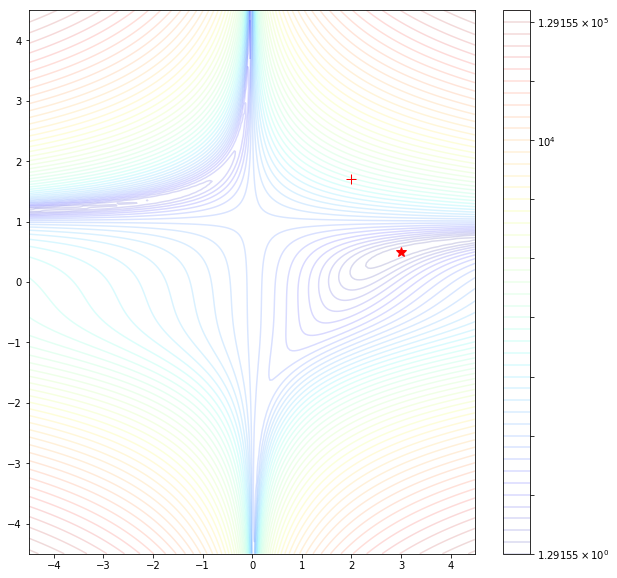

In [17]:
ax = plt.gca()
cm=ax.contour(x, y, z, levels=np.logspace(0, logzmax//2, 55), norm=LogNorm(), cmap=plt.cm.jet, alpha=0.15)
plt.colorbar(cm)
ax.plot(*minima_, 'r*', markersize=10)
ax.plot(*problem.x0, 'r+', markersize=10)
plt.show()

# Versuchsaufbau und Durchführung

In [18]:
scheduler = lambda optimizer, initial_lr: CyclicLR(optimizer, base_lr=1e-5, max_lr=initial_lr, step_size=100, mode='exp_range', gamma=0.9983)
scheduler = None

In [19]:
import torch.optim as optim
lr = problem.lr
constructors = dict(
    SGD= lambda params: optim.SGD(params, lr=lr/80),
    momentum = lambda params: optim.SGD(params, lr=lr/80, momentum=0.9, nesterov=False, dampening=0),
    momentum_dampen = lambda params: optim.SGD(params, lr=lr/80, momentum=0.9, nesterov=False, dampening=0.3),
    nesterov = lambda params: optim.SGD(params, lr=lr/80, momentum=0.9, nesterov=True, dampening=0),
    nesterov_decay = lambda params: optim.SGD(params, lr=lr/80, momentum=0.9, nesterov=True, weight_decay=1e-4, dampening=0),
    Adadelta = lambda params: optim.Adadelta(params),
    Adagrad = lambda params: optim.Adagrad(params, lr=lr*20),
    Adamax = lambda params: optim.Adamax(params, lr=lr*20),
    RMSprop = lambda params: optim.RMSprop(params, lr=lr*10),
    Adam = lambda params: optim.Adam(params, lr=lr*10),
)

In [20]:
results = {}
distance = {}

for name, constructor in tqdm(constructors.items()):
    data, dist, lrs = test_f(problem.f, problem.df, constructor, x0=problem.x0, steps=problem.steps, scheduler=scheduler)
    
    results[name] = data
    distance[name] = dist
len(results)

# calc paths and elevation
methods = constructors.keys()
paths = np.array([path.T for path in results.values()]) # should be (2,N) each
zpaths = np.array([distance[name] - z_min+ zeps for name in methods])
paths.shape, zpaths.shape

for i, name in enumerate(results):
    zmax = zpaths[i][np.isfinite(zpaths[i])].max()
    print(name, zmax, '\t', np.isfinite(zmax).all(), '\t', zmax.max()>z[:,0].max())
    
# clip zpaths
zmax = z.max()
zpaths[np.isfinite(zpaths)==False]=zmax
zpaths = np.clip(zpaths, 0, zmax)
zpaths.shape

/home/caxenie/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


HBox(children=(FloatProgress(value=0.0, max=10.0), HTML(value='')))


Adam 155.09430099999994 	 True 	 False
nesterov_decay 155.09430099999994 	 True 	 False
Adagrad 155.09430099999994 	 True 	 False
Adamax 155.09430099999994 	 True 	 False
nesterov 155.09430099999994 	 True 	 False
RMSprop 155.09430099999994 	 True 	 False
SGD 155.09430099999994 	 True 	 False
momentum_dampen 155.09430099999994 	 True 	 False
momentum 155.09430099999994 	 True 	 False
Adadelta 155.09430099999994 	 True 	 False


(10, 3400)

# Versuchsgraphen (statisch)

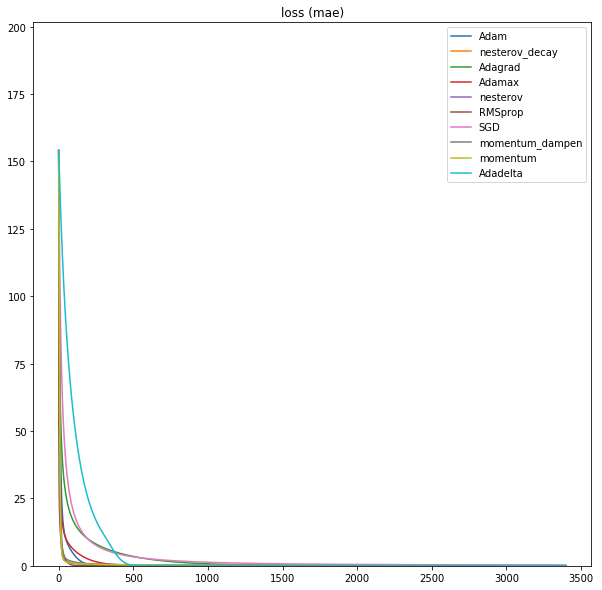

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


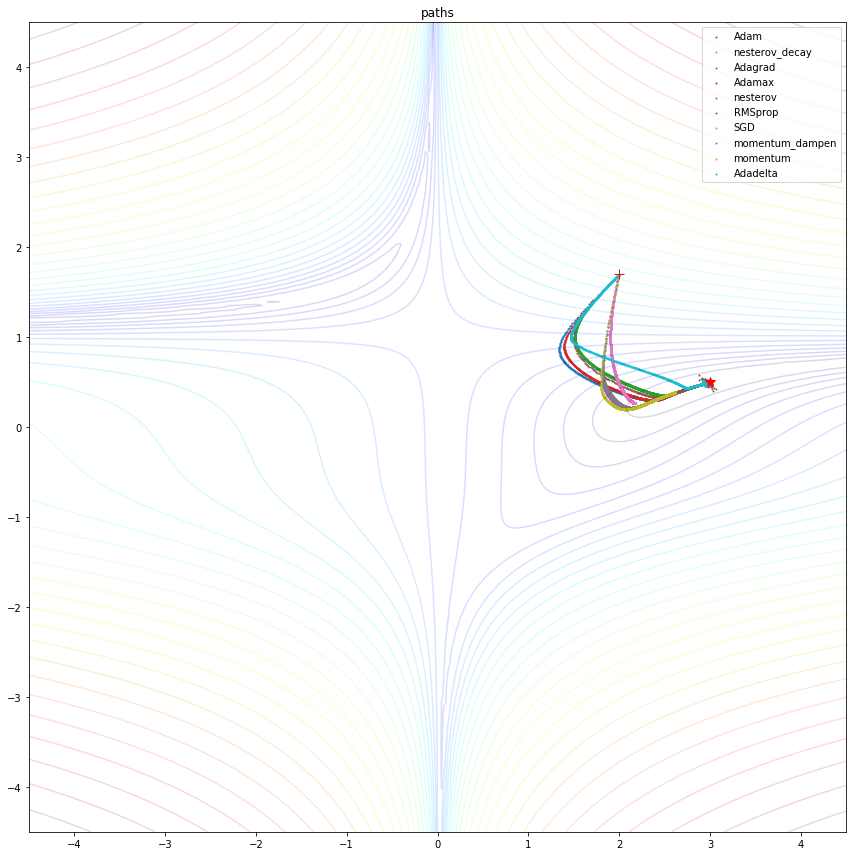

In [21]:
# static preview 2d to let you debug your steps and learning rate

# loss
for i, name in enumerate(results):
    plt.plot(np.abs(distance[name]), label=name)
plt.legend()
plt.title('loss (mae)')
plt.ylim(0,zpaths[:,0].mean()*1.3)
plt.show()


# Position
fig = plt.figure(figsize=(12,12))
fig.set_tight_layout(True)
ax = plt.gca()
for name in results:
    plt.scatter(*results[name].T, label=name, s=1)
plt.legend()
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

cm=ax.contour(x, y, z, levels=np.logspace(0, logzmax//2, 35), norm=LogNorm(), cmap=plt.cm.jet, alpha=0.15)
ax.plot(*minima_, 'r*', markersize=10)
ax.plot(*problem.x0, 'r+', markersize=10)
plt.title('paths')

plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


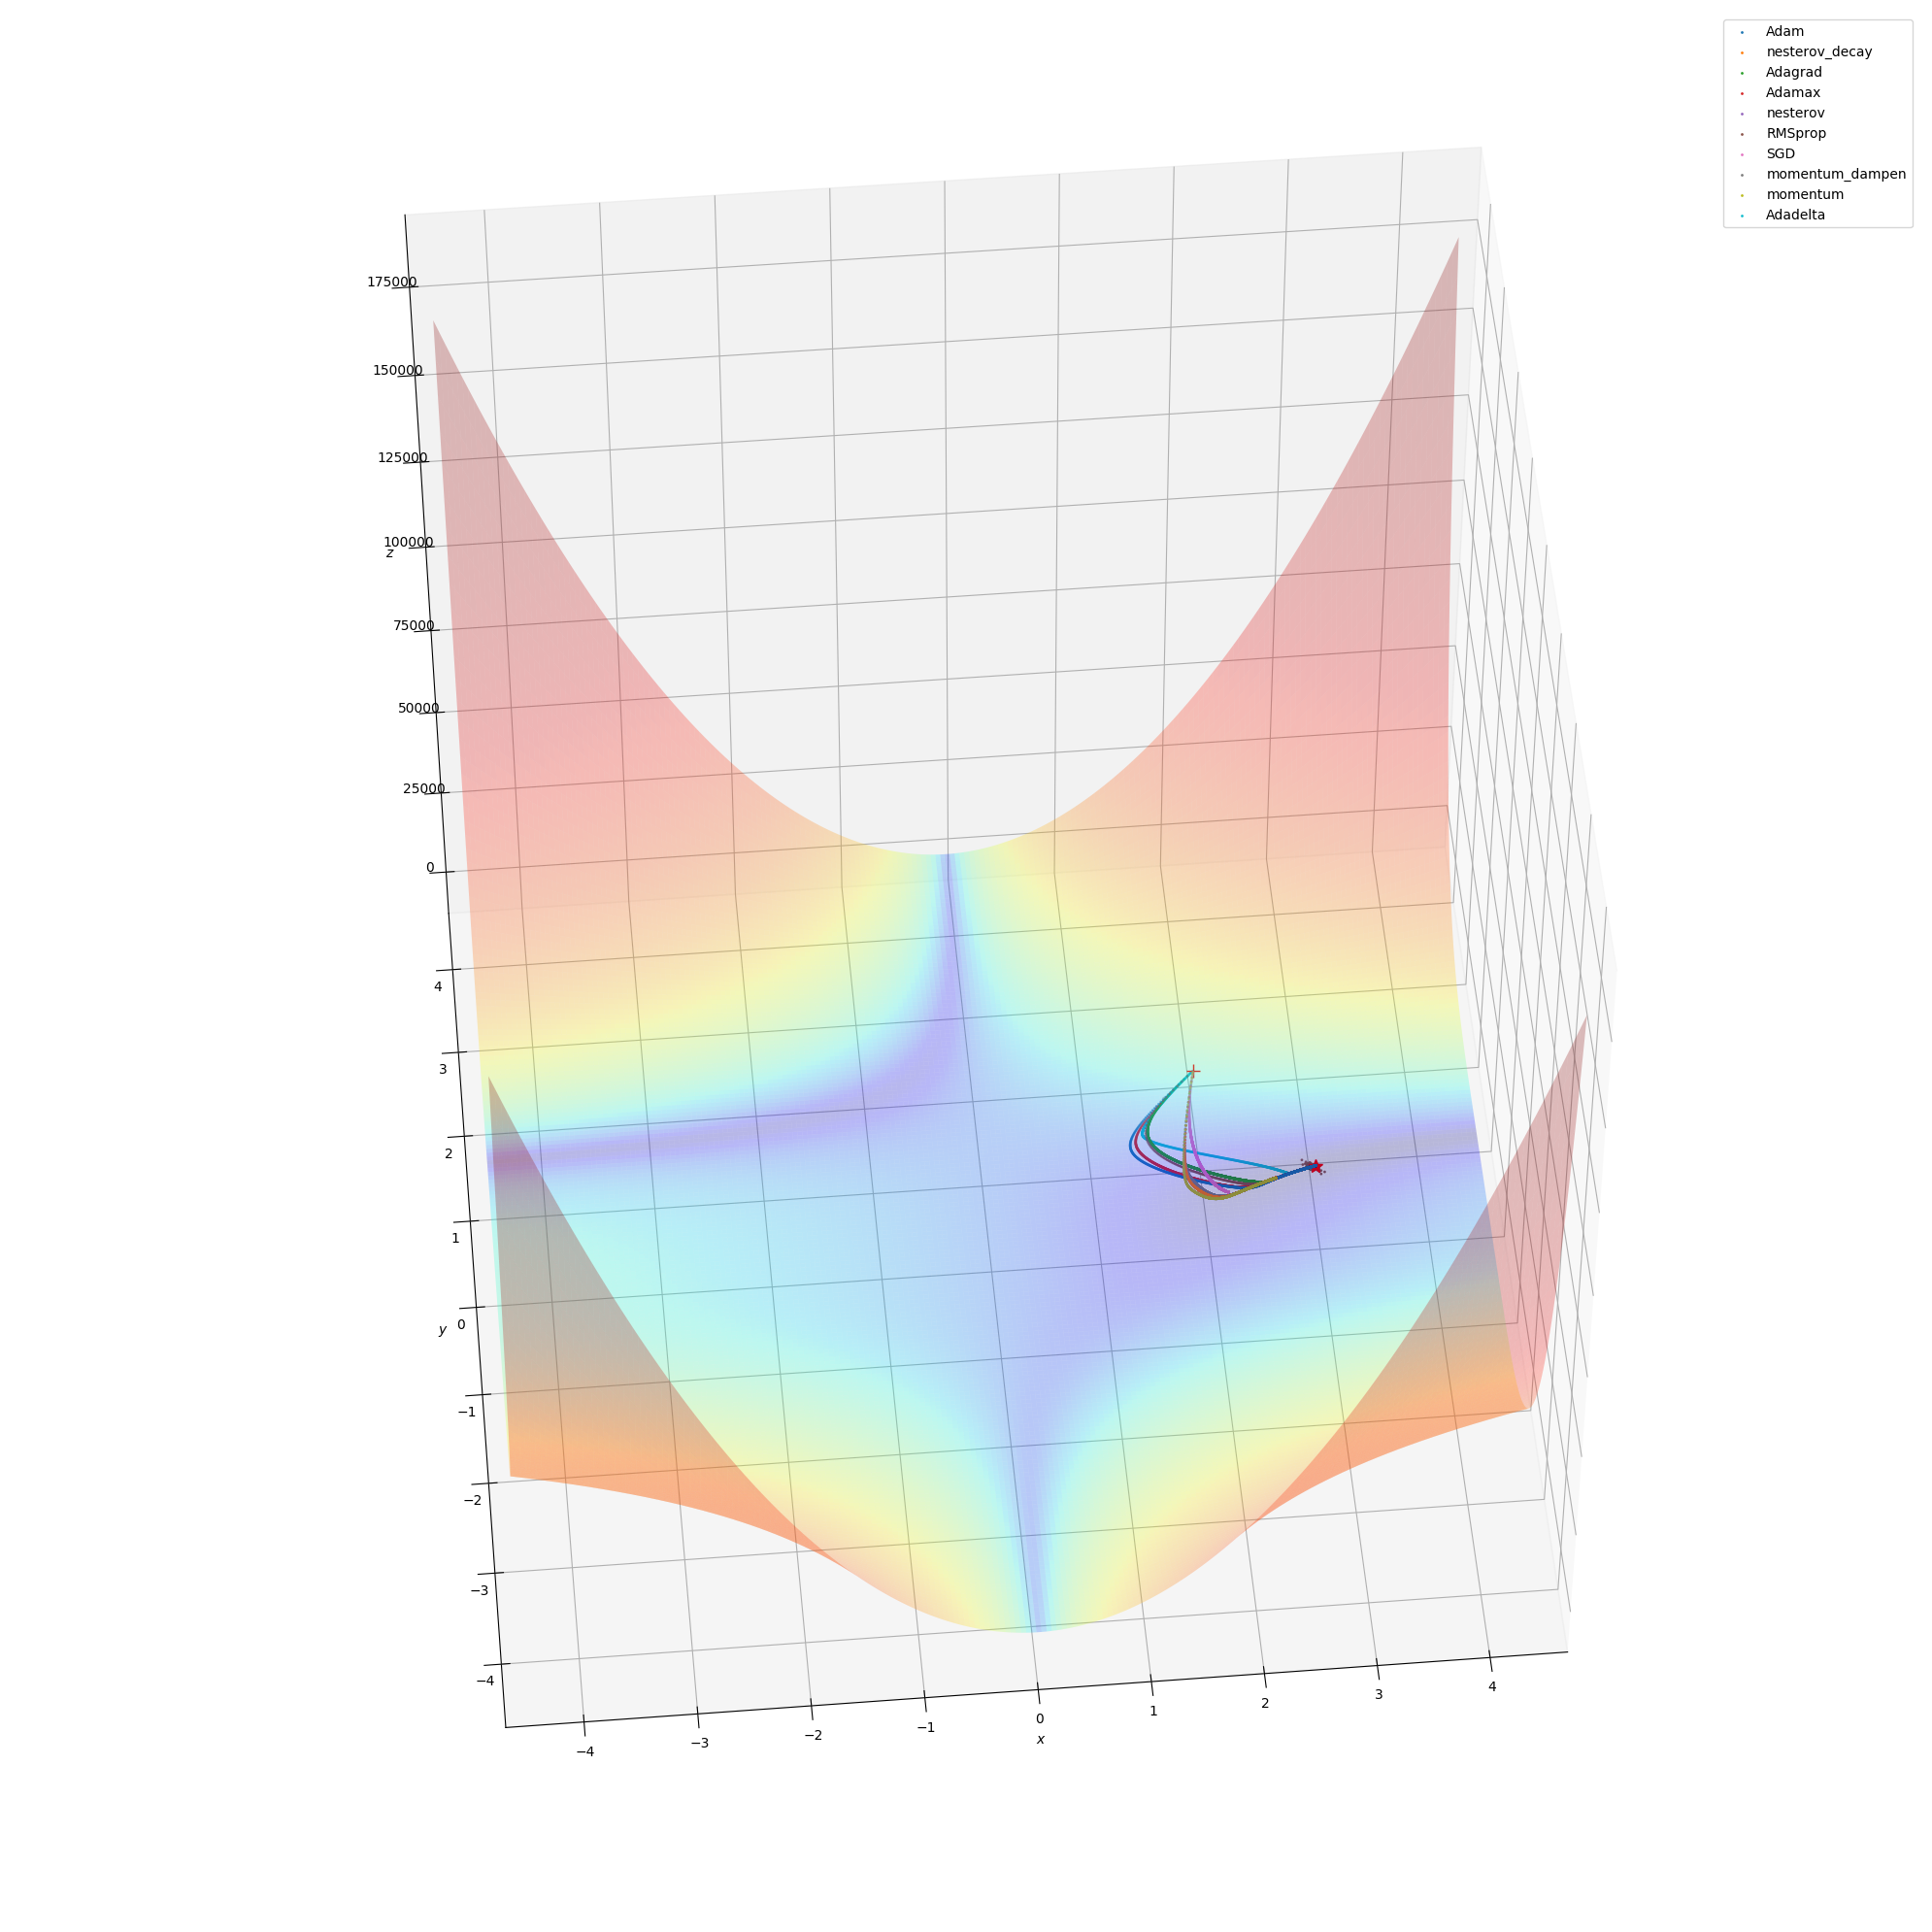

In [43]:
# static preview 3d
fig = plt.figure(figsize=(20, 20))
fig.set_tight_layout(True)
ax = plt.axes(projection='3d', elev=50, azim=azim)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.25, cmap=plt.cm.jet)
ax.plot(*minima_, problem.f(minima_).data.numpy(), 'r*', markersize=10)
ax.plot(*_x0, problem.f(_x0).data.numpy(), 'r+', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

# anim = TrajectoryAnimation3D(*paths, zpaths=zpaths, labels=methods, ax=ax)
# quick plot to let you debug your steps and learning rate
ax = plt.gca()
for i, name in enumerate(results):
    ax.scatter3D(*results[name].T, zpaths[i], label=name, s=1)
plt.legend()
plt.xlim(xmin,xmax)
plt.ylim(ymin,ymax)

ax.legend(loc='upper right')

# Versuchsgraphen (animiert)

In [38]:
from matplotlib import rcParams
rcParams['figure.figsize']=(10,10)
rcParams['figure.dpi']=100
rcParams['animation.writer']='ffmpeg' 
rcParams['savefig.dpi']=180
rcParams['animation.codec']='h264'

rcParams['savefig.bbox'] = 'tight'
seconds = 20
fps = 30
rcParams['animation.bitrate']=-1 
cuttoff=problem.steps//1

decimation = int(np.round(cuttoff/(seconds*fps))) or 1 
decimation, cuttoff,seconds*fps, problem.steps

if scheduler:
    params = Variable(torch.Tensor([0,1]), requires_grad=True)
    optimizer = optim.Adam([params])
    scheduler_name = type(scheduler(optimizer, 0.1)).__name__
else:
    scheduler_name='None'

In [39]:
class TrajectoryAnimation(animation.FuncAnimation):
    
    def __init__(self, *paths, labels=[], fig=None, ax=None, frames=None, 
                 interval=60, repeat_delay=5, blit=True, **kwargs):

        if fig is None:
            if ax is None:
                fig, ax = plt.subplots()
            else:
                fig = ax.get_figure()
        else:
            if ax is None:
                ax = fig.gca()

        self.fig = fig
        self.ax = ax
        
        self.paths = paths

        if frames is None:
            frames = max(path.shape[1] for path in paths)
  
        self.lines = [ax.plot([], [], label=label, lw=2)[0] 
                      for _, label in zip_longest(paths, labels)]
        self.points = [ax.plot([], [], 'o', color=line.get_color())[0] 
                       for line in self.lines]

        super(TrajectoryAnimation, self).__init__(fig, self.animate, init_func=self.init_anim,
                                                  frames=frames, interval=interval, blit=blit,
                                                  repeat_delay=repeat_delay, **kwargs)

    def init_anim(self):
        for line, point in zip(self.lines, self.points):
            line.set_data([], [])
            point.set_data([], [])
        return self.lines + self.points

    def animate(self, i):
        for line, point, path in zip(self.lines, self.points, self.paths):
            line.set_data(*path[::,:i])
            point.set_data(*path[::,i-1:i])
        return self.lines + self.points

In [40]:
class TrajectoryAnimation3D(animation.FuncAnimation):
    
    def __init__(self, *paths, zpaths, labels=[], fig=None, ax=None, frames=None, 
                 interval=60, repeat_delay=5, blit=True, **kwargs):

        if fig is None:
            if ax is None:
                fig, ax = plt.subplots()
            else:
                fig = ax.get_figure()
        else:
            if ax is None:
                ax = fig.gca()

        self.fig = fig
        self.ax = ax
        
        self.paths = paths
        self.zpaths = zpaths
        
        if frames is None:
            frames = max(path.shape[1] for path in paths)
  
        self.lines = [ax.plot([], [], [], label=label, lw=2)[0] 
                      for _, label in zip_longest(paths, labels)]

        super(TrajectoryAnimation3D, self).__init__(fig, self.animate, init_func=self.init_anim,
                                                  frames=frames, interval=interval, blit=blit,
                                                  repeat_delay=repeat_delay, **kwargs)

    def init_anim(self):
        for line in self.lines:
            line.set_data([], [])
            line.set_3d_properties([])
        return self.lines

    def animate(self, i):
        for line, path, zpath in zip(self.lines, self.paths, self.zpaths):
            line.set_data(*path[::,:i])
            line.set_3d_properties(zpath[:i])
        return self.lines

# 2D Animation

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


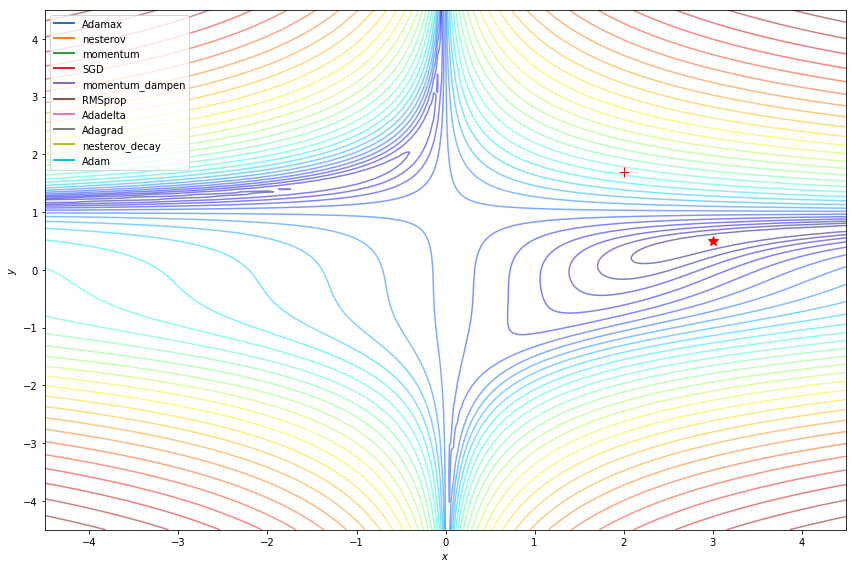

In [176]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.set_tight_layout(True)
ax.contour(x, y, z, levels=np.logspace(0, logzmax//2, 35), norm=LogNorm(), cmap=plt.cm.jet, alpha=0.5)
ax.plot(*minima_, 'r*', markersize=10)
ax.plot(*problem.x0, 'r+', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

anim = TrajectoryAnimation(*paths[:,:,:cuttoff:decimation], labels=methods, ax=ax, interval=1000//fps)

ax.legend(loc='upper left')

anim.save('demo.mp4', fps=fps, writer="ffmpeg", codec='h264')
#anim.save('demo_anim.gif', dpi=80, writer="imagemagick") # slow, makes a large gif file

In [177]:
anim.save('demo_anim.gif', dpi=80, writer="imagemagick") # slow, makes a large gif file

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


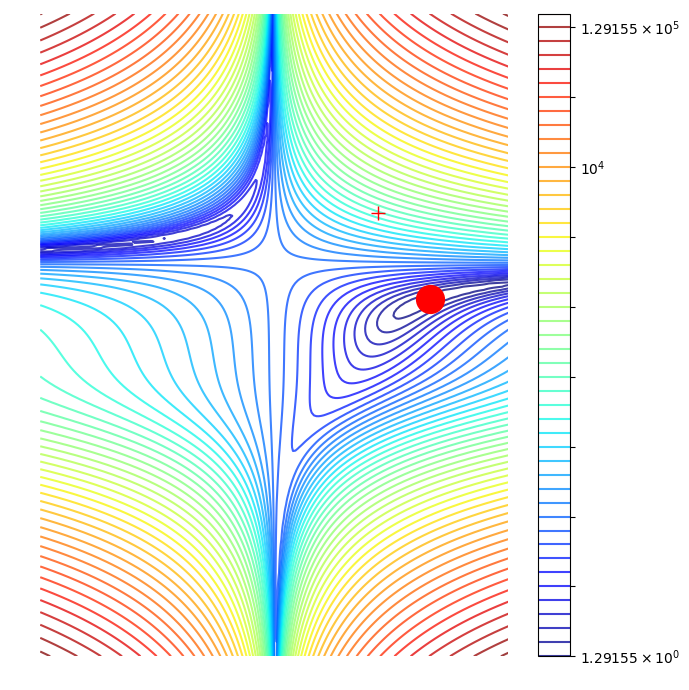

In [69]:
# Plot single trace
fig = plt.figure(figsize=(7,7))
fig.set_tight_layout(True)
ax = plt.gca()

cm=ax.contour(x, y, z, levels=np.logspace(0, logzmax//2, 55), norm=LogNorm(), cmap=plt.cm.jet, alpha=0.75)
ax.plot(*minima_, 'ro', markersize=20)
ax.plot(*problem.x0, 'r+', markersize = 10)
plt.colorbar(cm)
axis('off')
box('off')
plt.show()

anim = TrajectoryAnimation(paths[9,:,:cuttoff:decimation], ax=ax, interval=50//fps)

anim.save('opt-generic.gif', dpi=80, writer="imagemagick") # slow, makes a large gif file

# 3D Animation

/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


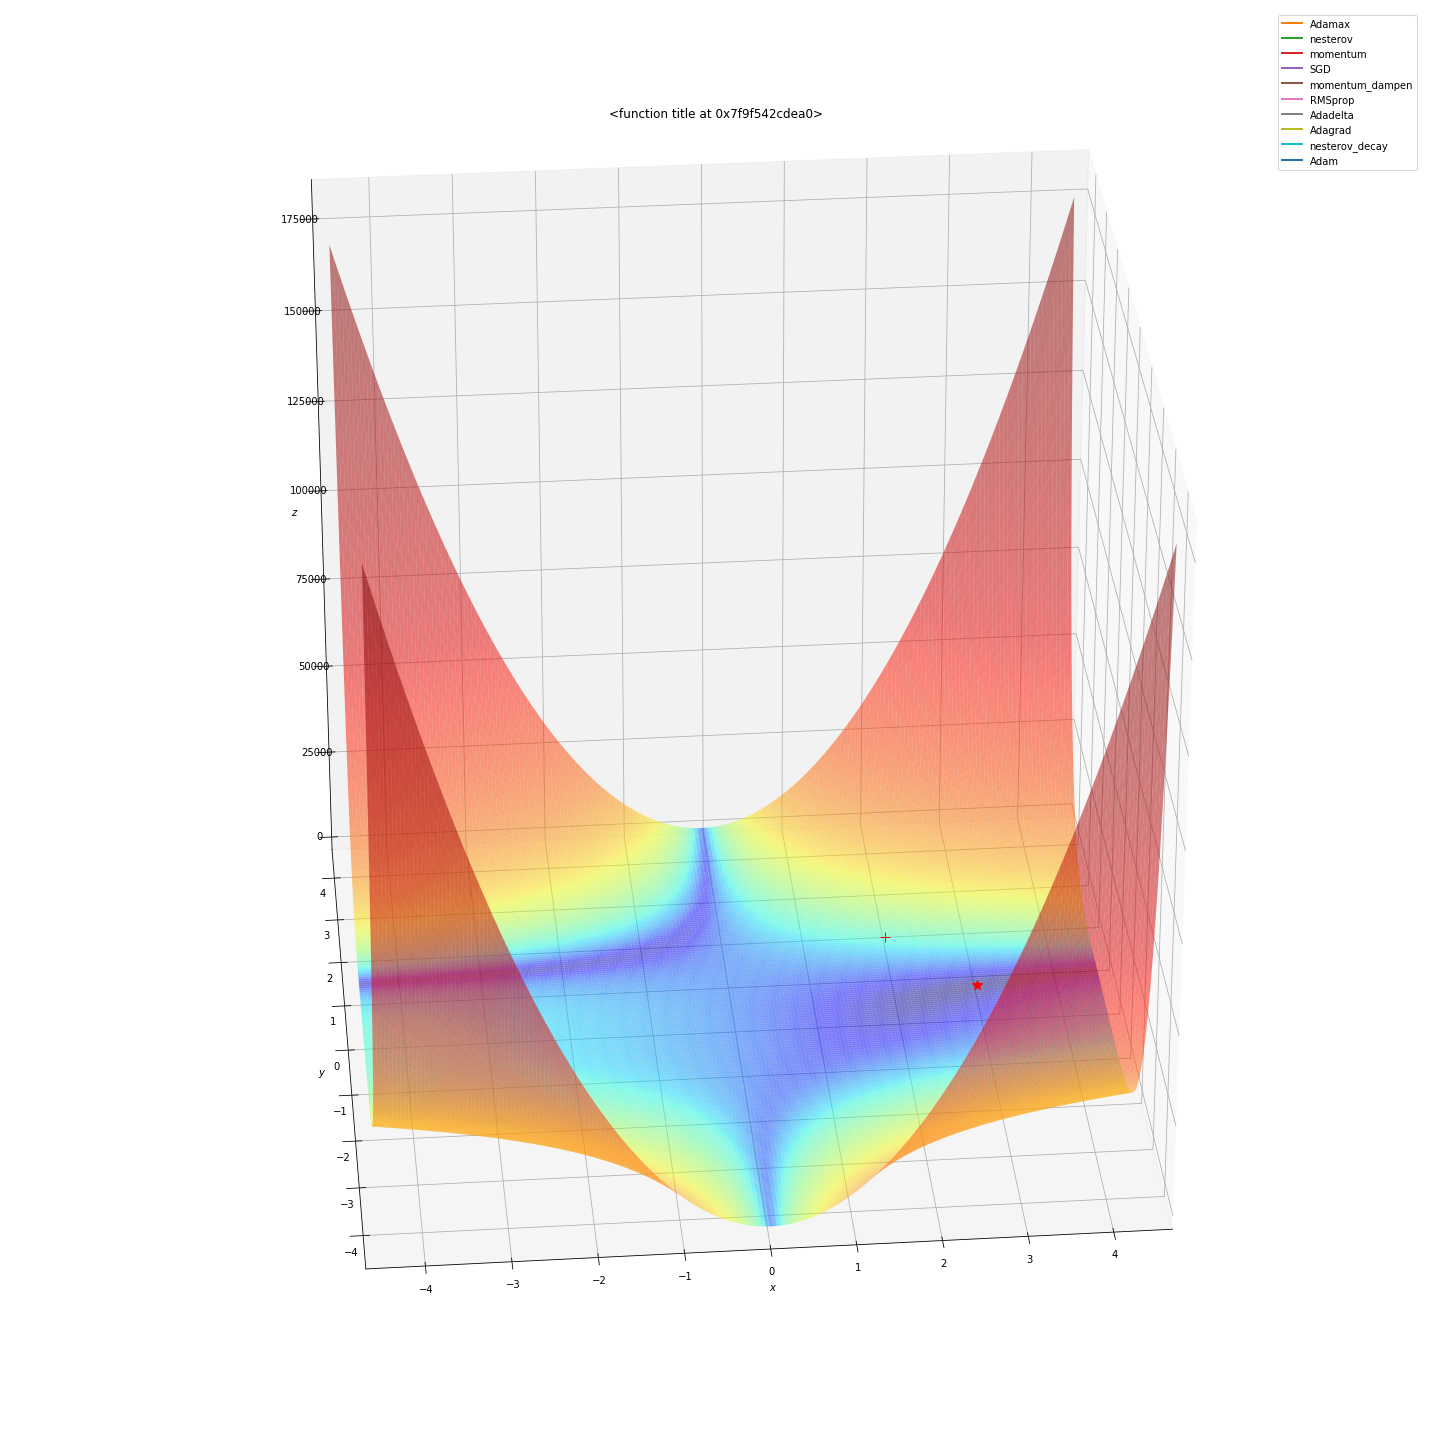

In [180]:
fig = plt.figure(figsize=(20, 20))
fig.set_tight_layout(True)
ax = plt.axes(projection='3d', elev=30, azim=azim)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.5, cmap=plt.cm.jet)
ax.plot(*minima_, problem.f(minima_).data.numpy(), 'r*', markersize=10)
ax.plot(*_x0, problem.f(_x0).data.numpy(), 'r+', markersize=10)

ax.set_title(title)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

anim = TrajectoryAnimation3D(*paths[:,:,:cuttoff:decimation], zpaths=zpaths[:,:][:,:cuttoff:decimation], labels=methods, ax=ax, interval=1000//fps)

ax.legend(loc='upper right')

anim.save('demo_3d.mp4', fps=fps, writer="ffmpeg", codec='h264')

In [181]:
anim.save('demo_anim_3d.gif', dpi = 80, writer="imagemagick")

# Verlustfunktion animation

In [182]:
index = np.arange(1,problem.steps+1,1)[None,:]
index= np.array([index]*zpaths.shape[0])
loss_paths = np.concatenate([index, zpaths[:,None,:]], 1)

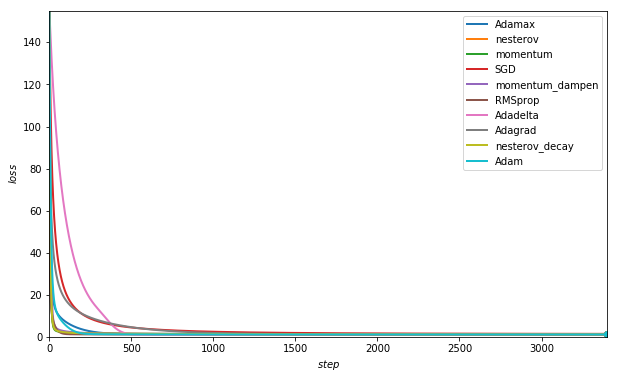

In [183]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('$step$')
ax.set_ylabel('$loss$')

ax.set_xlim((0, loss_paths[:,0,:].max()))
ax.set_ylim((0, loss_paths[:,1,:].max()))

anim = TrajectoryAnimation(*loss_paths[:,:,:], labels=methods, ax=ax)

ax.legend(loc='upper right')

anim.save('loss.mp4', fps=fps, writer="ffmpeg", codec='h264')

In [184]:
anim.save('loss_anim.gif', dpi = 80, writer="imagemagick")